# Hierarchical Geographical Clustering 

In this notebook an example on how to the data was created for the *Hierarchical Geo Clustering* article was created and all the evaluations from it. 

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import seaborn as sns
import pandas as pd
import importlib
from shapely.ops import polygonize_full, linemerge, unary_union
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import src.evaluation_helpers 
import seaborn
import itertools
from sklearn import metrics
import geopandas as gpd
import warnings
#warnings.simplefilter('ignore')
sns.set_style("darkgrid")
importlib.reload(src.evaluation_helpers) 

/home/miguel/anaconda3/envs/article_HGC/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


<module 'src.evaluation_helpers' from '/Partition1/Cgeo/git/HGC_Article/src/evaluation_helpers.py'>

To install the library inside an enviroment can be done by creating a new enviroment and then installing the HierarchicalGeoClustering library. Since most of the library dependencies can be installed using pip and are install when the library is install we can not worry abo them, except one dependency the *CGAL* library. The easys way to install such dependensy is through conda, to do so conda-forge has the CGAL library ready to install by `conda install -c conda-forge cgal`. To install the library the fowoling comand do the trick.


`pip install git+https://github.com/CentroGeo/HierarchicalGeoClustering.git`


With the library installed we now can create as many examples as we want and the corresponding results. To do so the file `create_experiment_script.py` does all the work to create the experiment and get only the result of them. The file uses `Clustering.generate_tree_clusterize_form` function to create the original data, and  clusterize using the *"Natural Cities", "DBSCAN", "OPTICS", "HDBSCAN", and "Adaptative DBSCAN"* algorithms. The results are store in several csv files in a specific path (seto to `../output/Data_experiments/`). The resulting files are the following:

* Exp_i_original_retag.csv contains the original points with its original corresponding tag.
* Exp_i_Natural_C.csv contains the points with the labels assigned for the Natural cities clusterization algorithm.
* Exp_i_DBSCAN.csv contains the points with the labels assigned for the DBSCAN clusterization algorithm.
* Exp_i_OPTICS.csv contains the points with the labels assigned for the OPTICS clusterization algorithm.
* Exp_i_HDBSCAN.csv contains the points with the labels assigned for the HDBSCAN clusterization algorithm.
* Exp_i_Adap_DBSCAN.csv contains the points with the labels assigned for the Adaptative DBSCAN clusterization algorithm.

* Exp_i_original_Noise_signal.csv contains the original points with its corresponding tags of Noise or signal. 
* Exp_i_Natural_C_Noise_signal.csv contains the points with the labels Noise or Signal on the corresponding label assigned for the Natural cities clusterization algorithm.
* Exp_i_DBSCAN_Noise_signal.csv contains the points with the labels Noise or Signal assigned for the DBSCAN clusterization algorithm.
* Exp_i_OPTICS_Noise_signal.csv contains the points with the labels Noise or Signal assigned for the OPTICS clusterization algorithm.
* Exp_i_HDBSCAN_Noise_signal.csv contains the points with the labels Noise or Signal assigned for the HDBSCAN clusterization algorithm.
* Exp_i_Adap_DBSCAN_Noise_signal.csv contains the points with the labels Noise or Signal assigned for the Adaptative DBSCAN clusterization algorithm.

* Exp_i_Similarity The comparasing of all clusterization algorithms using the Similarity Shape Mesurment.


The comparations are made using the *"Normalize Mutual Information", "Balanced Accuracy Score", and "Similarity Shape Measurement"*. For the *"Normalize Mutual Information" and "Balanced Accuracy Score"* are made in the `get_results_level` define in this notebook using the tags in the "Noise_signal" files. For the Similarity Shape Measurement, the polygons of the clusterizations are needed therefore the comparations are done inside the `generate_tree_clusterize_form` function inside the create experiment script. 


In this notebook only $3$ examples for each pair of levels ($3,4,5$) and points per cluster ($200, 300, 400$) are made. The results are sore in folders for each level (had to be previusly created). With the data created the corresponding plots are made. The data used for the articles has a lot more experiments. 


More experiments can be created by changing the amount of experiments to create, this takes a lot of time since is **computer intensive**. 


If all the notebook has been run previusly and some experiments has already been done, the flag `create_more` set to `True` can be use to create more experiments with out lossing the previus generated. The `--prefix` should be changed every time a new batch of new experiments is created to differentiate the resulting files.

More experiments can be created by changing the amount of experiments to create, this takes a lot of time since is **computer intensive**. 

The `create_experiment_script` can be call using the terminal inside an enviroment with the HierarchicalGeoClustering library installed.

To call the script can be done like:

`python create_experiment_script.py --exp Num_exp --levels Level --points N --path Path` 

Where `Num_exp` is the number of experiments to create, `Level`the number of levels, $N$ is the number of points per cluster and the `Path` is the path where to store the resulting data. 

In this notebook the path of the resulting files is `../output/Data_experiments/Level_i/N_p` modifing the `Level_i` and `N_p` accordingly.

In [36]:
create_more=False ## If previus data has been created

## Level 3

Create 3 experiments with 3 levels with 200 points and store in `../output/Data_experiments/Level_3/200_p`

In [3]:
if not os.listdir('../output/Data_experiments/Level_3/200_p/') :
    print("Directory is empty")
    print("Creating experiments")
    %%run create_experiment_script.py --exp 3 --levels 3 --points 200 --path ../output/Data_experiments/Level_3/200_p
else:    
    print("Directory is not empty")
    if create_more:
        print('create more experiments')
        %run create_experiment_script.py --exp 1 --levels 3 --points 200 --prefix b1_ --path ../output/Data_experiments/Level_3/200_p
    else:
        print("Not create more experiments")

Directory is not empty
Not create more experiments


Create 3 experiments with 3 levels with 300 points and store in `../output/Data_experiments/Level_3/300_p`

In [4]:
if not os.listdir('../output/Data_experiments/Level_3/300_p') :
    print("Directory is empty")
    print("Creating experiments")
    %%run create_experiment_script.py --exp 3 --levels 3 --points 300 --path ../output/Data_experiments/Level_3/300_p
else:    
    print("Directory is not empty")
    if create_more:
        print('create more experiments')
        %run create_experiment_script.py --exp 3 --levels 3 --points 300 --prefix b1_ --path ../output/Data_experiments/Level_3/300_p
    else:
        print("Not create more experiments")

Directory is not empty
Not create more experiments


Create 3 experiments with 3 levels with 400 points and store in `../output/Data_experiments/Level_3/400_p`

In [5]:
if not os.listdir('../output/Data_experiments/Level_3/400_p') :
    print("Directory is empty")
    print("Creating experiments")
    %%run create_experiment_script.py --exp 3 --levels 3 --points 400 --path ../output/Data_experiments/Level_3/400_p
else:    
    print("Directory is not empty")
    if create_more:
        print('create more experiments')
        %run create_experiment_script.py --exp 3 --levels 3 --points 400 --prefix b1_ --path ../output/Data_experiments/Level_3/400_p
    else:
        print("Not create more experiments")

Directory is not empty
Not create more experiments


## Level 4

Create 3 experiments with 4 levels with 200 points and store in `../output/Data_experiments/Level_4/200_p`

In [6]:
if not os.listdir('../output/Data_experiments/Level_4/200_p') :
    print("Directory is empty")
    print("Creating experiments")
    %run create_experiment_script.py --exp 3 --levels 4 --points 200 --path ../output/Data_experiments/Level_4/200_p
else:    
    print("Directory is not empty")
    if create_more:
        print('create more experiments')
        %run create_experiment_script.py --exp 3 --levels 4 --points 200 --prefix b1_ --path ../output/Data_experiments/Level_4/200_p
    else:
        print("Not create more experiments")


Directory is not empty
Not create more experiments


Create 3 experiments with 4 levels with 300 points and store in `../output/Data_experiments/Level_4/300_p`

In [7]:
if not os.listdir('../output/Data_experiments/Level_4/300_p') :
    print("Directory is empty")
    print("Creating experiments")
    %run create_experiment_script.py --exp 3 --levels 4 --points 300 --path ../output/Data_experiments/Level_4/300_p
else:    
    print("Directory is not empty")
    if create_more:
        print('create more experiments')
        %run create_experiment_script.py --exp 3 --levels 4 --points 300 --prefix b1_ --path ../output/Data_experiments/Level_4/300_p
    else:
        print("Not create more experiments")

Directory is not empty
Not create more experiments


Create 3 experiments with 4 levels with 400 points and store in `../output/Data_experiments/Level_4/400_p`

In [8]:
if not os.listdir('../output/Data_experiments/Level_4/400_p') :
    print("Directory is empty")
    print("Creating experiments")
    %run create_experiment_script.py --exp 3 --levels 4 --points 400 --path ../output/Data_experiments/Level_4/400_p
else:    
    print("Directory is not empty")
    if create_more:
        print('create more experiments')
        %run create_experiment_script.py --exp 3 --levels 4 --points 400 --prefix b1_ --path ../output/Data_experiments/Level_4/400_p
    else:
        print("Not create more experiments")


Directory is not empty
Not create more experiments


## Level 5

Create 3 experiments with 5 levels with 200 points and store in `../output/Data_experiments/Level_5/200_p`

In [9]:
if not os.listdir('../output/Data_experiments/Level_5/200_p') :
    print("Directory is empty")
    print("Creating experiments")
    %run create_experiment_script.py --exp 3 --levels 5 --points 200 --path ../output/Data_experiments/Level_5/200_p
else:    
    print("Directory is not empty")
    if create_more:
        print('create more experiments')
        %run create_experiment_script.py --exp 3 --levels 5 --points 200 --prefix b1_ --path ../output/Data_experiments/Level_5/200_p
    else:
        print("Not create more experiments")

Directory is not empty
Not create more experiments


Create 3 experiments with 4 levels with 300 points and store in `../output/Data_experiments/Level_5/300_p`

In [10]:
if not os.listdir('../output/Data_experiments/Level_5/300_p') :
    print("Directory is empty")
    print("Creating experiments")
    %run create_experiment_script.py --exp 3 --levels 5 --points 300 --path ../output/Data_experiments/Level_5/300_p
else:    
    print("Directory is not empty")
    if create_more:
        print('create more experiments')
        %run create_experiment_script.py --exp 3 --levels 5 --points 300 --prefix b1_ --path ../output/Data_experiments/Level_5/300_p
    else:
        print("Not create more experiments")

Directory is not empty
Not create more experiments


Create 3 experiments with 4 levels with 400 points and store in `../output/Data_experiments/Level_4/400_p`

In [11]:
if not os.listdir('../output/Data_experiments/Level_4/400_p') :
    print("Directory is empty")
    print("Creating experiments")
    %run create_experiment_script.py --exp 3 --levels 5 --points 400 --path ../output/Data_experiments/Level_5/400_p
else:    
    print("Directory is not empty")
    if create_more:
        print('create more experiments')
        %run create_experiment_script.py --exp 3 --levels 5 --points 400 --prefix b1_ --path ../output/Data_experiments/Level_5/400_p
    else:
        print("Not create more experiments")

Directory is not empty
Not create more experiments


## Load Save data 

The following function gets the data from the save "Noise_signal" csv files and put it in a corresponding dataframe, the "Normalize Mutual Information" is obtained using all the tags levels in the *"concat_tags_signal"* column for each clustering algorithm versus the original tags. The results are inserted inside a Dataframe for all the experiments with its corresponding tag. 

To evaluate the "Balanced Acuracy Score" the evaluation is done using the `Eval_level_metric` in the "evaluation_helpers.py" file, the function has been created to evaluate on different types of metrics. The results are inserted in a DataFrame one for each level for each experiment.   

The function also exctracts the results of the "Similarity Shape Mesurment" and  insertem inside a DataFrame also une for each distinct level and for each experiment. 

In [12]:
def get_results_level( path_ , points_li ):
    """
    Gets the results by level 
    """
    
    paths= []
    prefixs = []
    for num in points_li:
        path = path_+ str(num)+'_p'
        #print(path)
        all_files = os.listdir(path)
        prefix = list(set([ key for key, valu in itertools.groupby(all_files,
                                                             lambda l: l[:l.find('_',
                                                                                 l.find('_')+2)
                                                                        ]
                                                            )]))
        paths.append(path)
        prefixs.append(prefix)
    
    ziped_files = zip(paths, prefixs, points_li)        
    all_levels = []
    all_points = []
    all_similarity = []
    for path ,files, size in ziped_files :
        #print(files)
        for pre in files:
            all_dataframes_Exp_i = {
                                'original_retag': pd.read_csv(path +'/'+ pre +'_original_retag_Noise_signal.csv'),
                                'Natural_C': pd.read_csv(path +'/'+ pre +'_Natural_C_Noise_signal.csv'),
                                'DBSCAN': pd.read_csv(path +'/'+ pre +'_DBSCAN_Noise_signal.csv'),
                                'OPTICS': pd.read_csv(path +'/'+ pre +'_OPTICS_Noise_signal.csv'),
                                'HDBSCAN': pd.read_csv(path +'/'+ pre +'_HDBSCAN_Noise_signal.csv'),
                                #'Adap_DBSCAN': pd.read_csv(path +'/'+ pre +'_knee_Noise_signal.csv'),
                                'Adap_DBSCAN': pd.read_csv(path +'/'+ pre +'_Adap_DBSCAN_Noise_signal.csv'),
                                }


            #### All 
            all_origi = all_dataframes_Exp_i['original_retag']['concat_tags_signal']
            all_df_no = ['Natural_C', 'DBSCAN', 'OPTICS', 'HDBSCAN', 'Adap_DBSCAN']
            #all_df_no = ['Natural_C', 'DBSCAN', 'OPTICS', 'HDBSCAN', 'knee']
            dic_allpoints = {}
            val = all_dataframes_Exp_i['original_retag']['concat_tags_signal'].apply(lambda l: len(l.split('_'))).unique()[0]
            for df_name in all_df_no:
                
                all_clus_i = all_dataframes_Exp_i[df_name]['concat_tags_signal']
                res_all = metrics.normalized_mutual_info_score(all_origi, all_clus_i)##### Other metri
                dic_allpoints[df_name] = res_all
            
            dic_allpoints['Experiment'] = pre +'_' + str(size)
            dic_allpoints['Clus_size'] = size
            all_points.append(dic_allpoints)


            for i in range(0, val):
                leves_lis_i = src.evaluation_helpers.Eval_level_metric(all_dataframes_Exp_i, 
                                                metric_eval=metrics.balanced_accuracy_score,
                                                level=i)
                leves_lis_i['Experiment'] = pre+'_'+ str(size)
                leves_lis_i['Clus_size'] = size
                all_levels.append(leves_lis_i)
        
        
            df_similarity= pd.read_csv(path +'/'+ pre + '_Similarity.csv')
            df_similarity['Experiment']= pre + '_'+ str(size)
            df_similarity['Clus_size']= size
            all_similarity.append(df_similarity)
            all_concat= pd.concat(all_similarity, sort=False)
            all_concat.drop('Unnamed: 0', axis=1, inplace=True)

    all_data = pd.DataFrame(all_levels)
    df_all_points= pd.DataFrame(all_points)
    return {'BA':all_data, 'NMI': df_all_points, 'SSM':all_concat}
    
    

In [13]:
lev_3= get_results_level(path_= '../output/Data_experiments/Level_3/', points_li=[200,300,400])

In [32]:
lev_3['BA'].head()

,Natural_C,DBSCAN,OPTICS,HDBSCAN,Adap_DBSCAN,Level,Experiment,Clus_size
0,0.944645,0.743386,0.641063,0.791325,0.928458,0,Exp_0_200,200
1,0.790965,0.523385,0.498377,0.730036,0.864490,1,Exp_0_200,200
2,0.834295,0.568020,0.477392,0.594340,0.790509,2,Exp_0_200,200
3,1.000000,1.000000,1.000000,1.000000,1.000000,3,Exp_0_200,200
4,0.970009,0.638889,0.597162,0.773004,0.976109,0,Exp_1_200,200


In [33]:
lev_3['NMI'].head()

,Natural_C,DBSCAN,OPTICS,HDBSCAN,Adap_DBSCAN,Experiment,Clus_size
0,0.529477,0.292230,0.015531,0.239518,0.614585,Exp_0_200,200
1,0.524770,0.189437,0.008666,0.219760,0.442300,Exp_1_200,200
2,0.707487,0.609456,0.009454,0.248163,0.742269,Exp_2_200,200
3,0.604913,0.415650,0.021519,0.238214,0.742748,Exp_0_300,300
4,0.504496,0.165377,0.010555,0.190879,0.440244,Exp_1_300,300
5,0.366933,0.281280,0.006246,0.125787,0.342401,Exp_2_300,300
6,0.483132,0.053086,0.011794,0.229068,0.641856,Exp_0_400,400
7,0.387889,0.559350,0.003466,0.127993,0.565592,Exp_1_400,400
8,0.551598,0.244497,0.009548,0.207393,0.685185,Exp_2_400,400


In [35]:
lev_3['SSM'].head()

,Level,DBSCAN,HDBSCAN,Natural,OPTICS,Adap_DBSCAN,Experiment,Clus_size
0,0,0.761810,0.761810,0.761810,0.761810,0.761810,Exp_0_200,200
1,1,0.048139,0.007241,0.028393,0.000007,0.666580,Exp_0_200,200
2,2,0.004272,0.000007,0.003431,0.000002,0.681906,Exp_0_200,200
0,0,0.830158,0.830158,0.830158,0.830158,0.830158,Exp_1_200,200
1,1,0.042503,0.000055,0.000125,0.000019,0.435127,Exp_1_200,200


### BAS
To plot the results using the seaborn library a function to flat the dataframe resulting for the *Balanced Acuracy Score* (BAS) is made. 

In [14]:
####
def flat_df(df_flat):
    """
    Flat the resulting dataframe
    """
    
    get_cols = ['Natural_C', 'DBSCAN', 'OPTICS', 'HDBSCAN', 'Adap_DBSCAN']
    new_app = []
    for col in get_cols:
        new = df_flat.loc[:, [col, 'Experiment', 'Level']]
        if 'Natural_C' in col:
            new['algorithm'] = 'Natural_C'
        elif 'Adap_DBSCAN' in col:
            new['algorithm'] = 'Adap_DBSCAN'
        else:
            new['algorithm'] = col[col.rfind('_',col.rfind('_'))+1 :]
        new['BAS'] = new[col]
        new.drop([col], axis=1, inplace = True)
        new_app.append(new)

    new_df = pd.concat(new_app)
    return new_df

In [15]:
res_BA= flat_df(lev_3['BA'])

Now the flat dataframe is pass to be ploted using the seaborn library. 

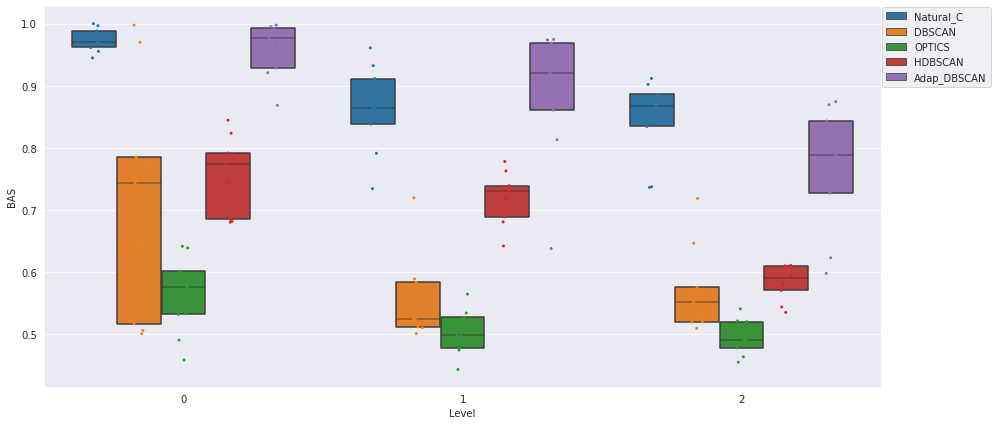

In [16]:
plt.figure(figsize=[15,7])

#####LA media

ax = seaborn.boxenplot(x = 'Level', y = 'BAS',
                       hue='algorithm',
                       data = res_BA,
                       showfliers = False,
                      )
ax= seaborn.stripplot(x = 'Level', y = 'BAS', hue='algorithm',
                      data = res_BA[res_BA['Level'] != 3], dodge=True, size= 3,
                      )
l = ax.legend(title='Algorithm')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
#plt.savefig('./Images/BAS_3.pdf',dpi=600)

### NMI 
A function to flat the dataframe obtained from using the *Normalize Mutual Information* (NMI) in all the experiments. 

In [17]:
def flat_NMI(df_NMI):
    """Flat the NMI dataframe"""
    get_cols = ['Natural_C', 'DBSCAN', 'OPTICS', 'HDBSCAN', 'Adap_DBSCAN']
    all_point_se= []
    for col in get_cols:
        new=df_NMI.loc[:, [col, 'Experiment', 'Clus_size']]
        # new=df_all_points[[col, 'Experiment']]
        new['algorithm']=col
        new['NMI'] = new[col]
        new.drop([col],axis=1, inplace = True)
        all_point_se.append(new)
    all_point_se_df = pd.concat(all_point_se)
    return all_point_se_df


In [18]:
res_NMI= flat_NMI(lev_3['NMI'])

<AxesSubplot:xlabel='algorithm', ylabel='NMI'>

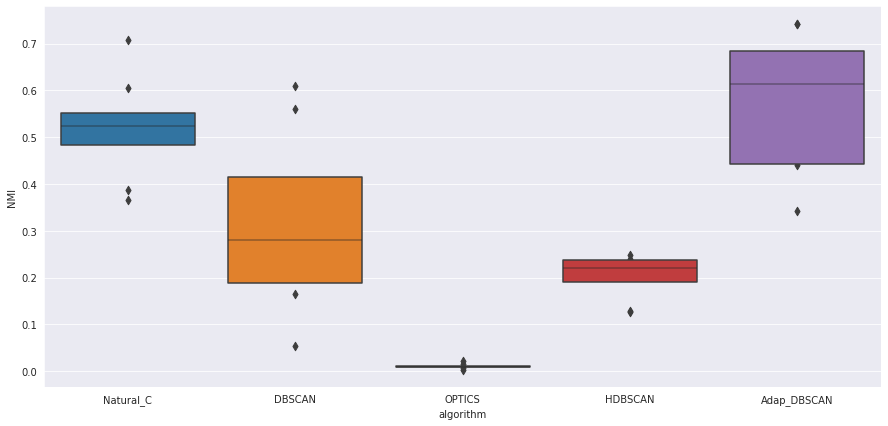

In [19]:
plt.figure(figsize=[15,7])
seaborn.boxenplot(x = 'algorithm', y = 'NMI', data = res_NMI)
#plt.savefig( './Images/all_levels_NMI_L3.pdf', dpi = 600)

### Similarity
The function flats the dataframe for the resulting dataframe of the comparations using the *Similarity Shape Meshurment* (SSM) on all the experiments.  

In [20]:
def flat_SSM(df_SSM):
    """Flat SSM dataframe"""
    df_SSM.rename(columns= {'knee':'Adap_DBSCAN'},inplace=True)
    get_cols_similarity= ['Natural','DBSCAN','OPTICS','HDBSCAN','Adap_DBSCAN']
    new_app_simi= []
    for col in get_cols_similarity:
        new=df_SSM[[ 'Experiment', 'Level', col]]

        new['algorithm']= col
        new['SSM'] = new[col]

        new.drop([col],axis=1, inplace = True)
        new_app_simi.append(new)
    new_df_similarity = pd.concat(new_app_simi)
    return new_df_similarity

In [21]:
res_SSM= flat_SSM(lev_3['SSM'])

/tmp/ipykernel_1699749/1751476183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['algorithm']= col
/tmp/ipykernel_1699749/1751476183.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['SSM'] = new[col]
/home/miguel/anaconda3/envs/article_HGC/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [22]:
res_SSM

,Experiment,Level,algorithm,SSM
0,Exp_0_200,0,Natural,0.761810
1,Exp_0_200,1,Natural,0.028393
2,Exp_0_200,2,Natural,0.003431
0,Exp_1_200,0,Natural,0.830158
1,Exp_1_200,1,Natural,0.000125
...,...,...,...,...
1,Exp_1_400,1,Adap_DBSCAN,0.786601
2,Exp_1_400,2,Adap_DBSCAN,0.379612
0,Exp_2_400,0,Adap_DBSCAN,0.801846
1,Exp_2_400,1,Adap_DBSCAN,0.497326


Now the plot can be made using seaborn an be agregate by level

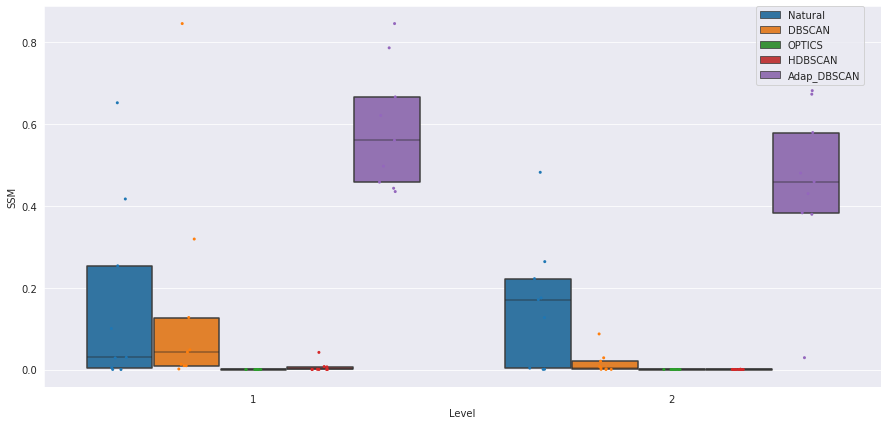

In [23]:
plt.figure(figsize=[15,7])
ax= seaborn.boxenplot(x = 'Level', y = 'SSM',
                      hue='algorithm', data =res_SSM[res_SSM['Level']!=0], 
                      showfliers = False, 
                      

                     )
ax= seaborn.stripplot(x = 'Level', y = 'SSM', hue='algorithm',
                  data = res_SSM[res_SSM['Level']!=0], dodge=True, size= 3,
                  
                  )
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Algorithm', bbox_to_anchor= (.85, 1) )
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(.85, 1), loc=2, borderaxespad=0.)


### Get plot for Level 4

We now are able to get the data and create the plots for all the experiments with $4$ levels.  


In [24]:
lev_4     = get_results_level(path_= '../output/Data_experiments/Level_4/', points_li=[200,300,400])
res_4_BA  = flat_df(lev_4['BA'])
res_4_NMI = flat_NMI(lev_4['NMI'])
res_4_SSM = flat_SSM(lev_4['SSM'])

/tmp/ipykernel_1699749/1751476183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['algorithm']= col
/tmp/ipykernel_1699749/1751476183.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['SSM'] = new[col]
/home/miguel/anaconda3/envs/article_HGC/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

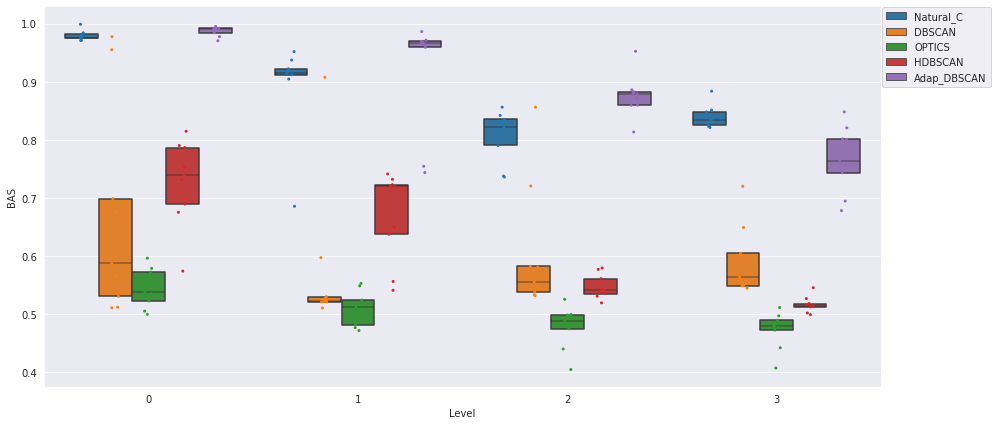

In [25]:
plt.figure(figsize=[15,7])
ax = seaborn.boxenplot(x = 'Level', y = 'BAS',
                       hue='algorithm',
                       data = res_4_BA,
                       showfliers = False,
                      )
ax= seaborn.stripplot(x = 'Level', y = 'BAS', hue='algorithm',
                      data = res_4_BA[res_4_BA['Level'] != 4], dodge=True, size= 3,
                      )
l = ax.legend(title='Algorithm')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)

<AxesSubplot:xlabel='algorithm', ylabel='NMI'>

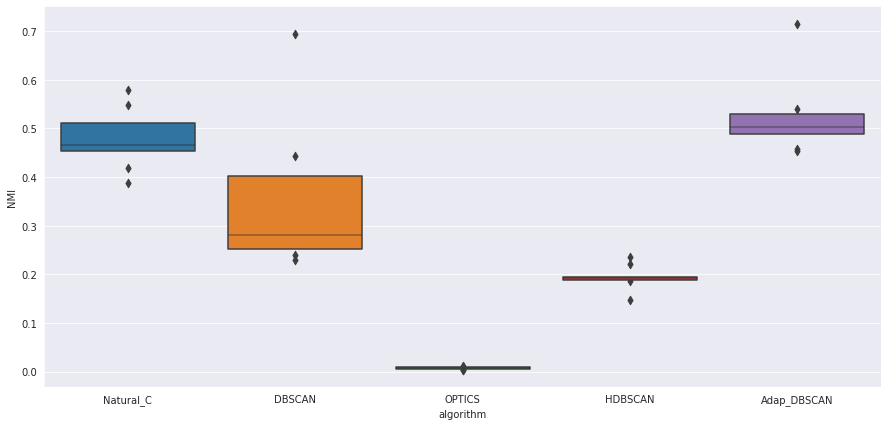

In [26]:
plt.figure(figsize=[15,7])
seaborn.boxenplot(x = 'algorithm', y = 'NMI', data = res_4_NMI)

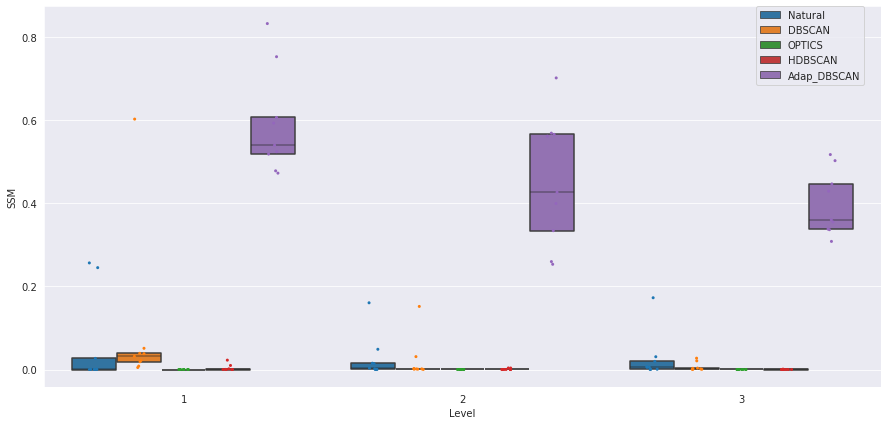

In [27]:
plt.figure(figsize=[15,7])
ax= seaborn.boxenplot(x = 'Level', y = 'SSM',
                      hue='algorithm', data =res_4_SSM[res_4_SSM['Level']!=0], 
                      showfliers = False, 
                      

                     )
ax= seaborn.stripplot(x = 'Level', y = 'SSM', hue='algorithm',
                  data = res_4_SSM[res_4_SSM['Level']!=0], dodge=True, size= 3,
                  
                  )
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Algorithm', bbox_to_anchor= (.85, 1) )
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(.85, 1), loc=2, borderaxespad=0.)

###  Level 5

Get data and plots for all the experiment with $5$ levels  

In [28]:
lev_5= get_results_level(path_= '../output/Data_experiments/Level_5/', points_li=[200,300,400])
res_5_BA= flat_df(lev_5['BA'])
res_5_NMI= flat_NMI(lev_5['NMI'])
res_5_SSM= flat_SSM(lev_5['SSM'])

/tmp/ipykernel_1699749/1751476183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['algorithm']= col
/tmp/ipykernel_1699749/1751476183.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['SSM'] = new[col]
/home/miguel/anaconda3/envs/article_HGC/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

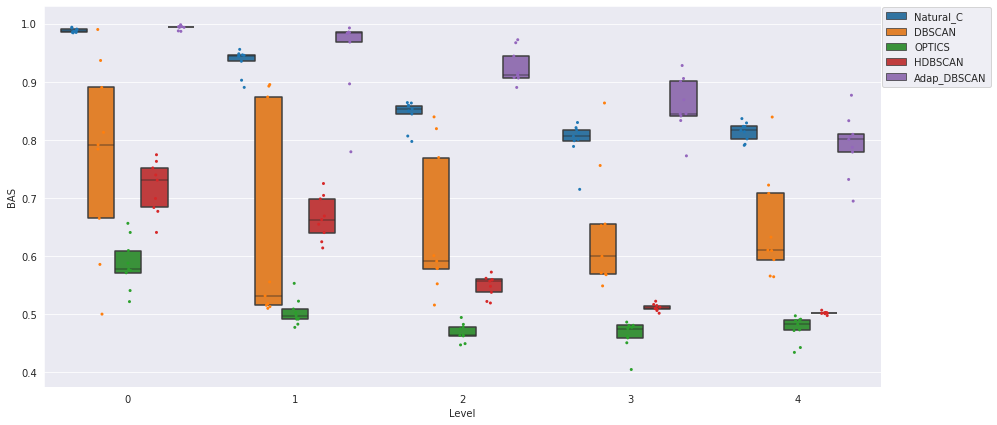

In [29]:
plt.figure(figsize=[15,7])
ax = seaborn.boxenplot(x = 'Level', y = 'BAS',
                       hue='algorithm',
                       data = res_5_BA,
                       showfliers = False,
                      )
ax= seaborn.stripplot(x = 'Level', y = 'BAS', hue='algorithm',
                      data = res_5_BA[res_5_BA['Level'] != 5], dodge=True, size= 3,
                      )
l = ax.legend(title='Algorithm')
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)

<AxesSubplot:xlabel='algorithm', ylabel='NMI'>

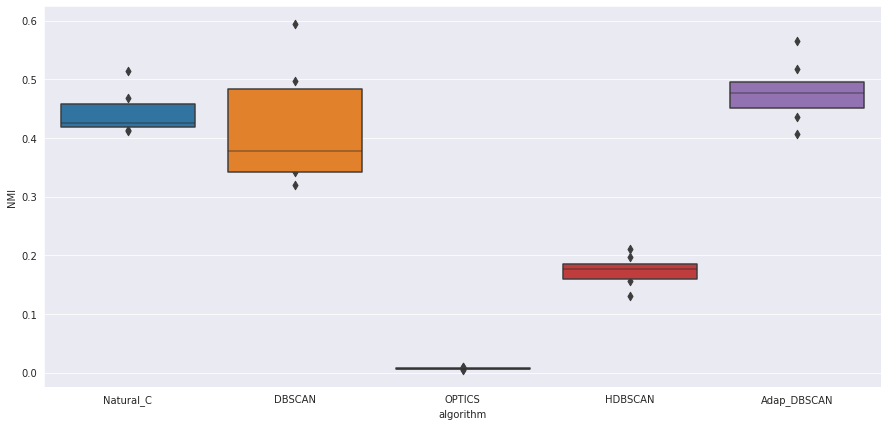

In [30]:
plt.figure(figsize=[15,7])
seaborn.boxenplot(x = 'algorithm', y = 'NMI', data = res_5_NMI)

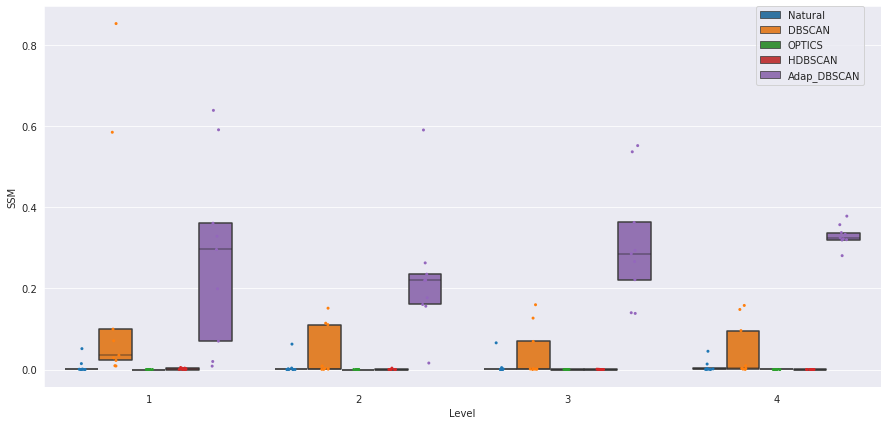

In [31]:
plt.figure(figsize=[15,7])
ax= seaborn.boxenplot(x = 'Level', y = 'SSM',
                      hue='algorithm', data =res_5_SSM[res_5_SSM['Level']!=0], 
                      showfliers = False, 
                      

                     )
ax= seaborn.stripplot(x = 'Level', y = 'SSM', hue='algorithm',
                  data = res_5_SSM[res_5_SSM['Level']!=0], dodge=True, size= 3,
                  
                  )
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Algorithm', bbox_to_anchor= (.85, 1) )
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(.85, 1), loc=2, borderaxespad=0.)